# MNIST For ML Beginners


A very simple MNIST classifier. See extensive documentation at http://tensorflow.org/tutorials/mnist/beginners/index.md

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os.path

import argparse
import sys
import datetime

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('data_dir', './', 'Directory to put the training data.')


##
iterations = 1000
batch_size = 100

In [2]:
print("********* META ***********")
print("TensorFlow version: "+str(tf.__version__))
print("Date: "+str(datetime.datetime.now()))
print("**************************")

********* META ***********
TensorFlow version: 0.12.0-rc1
Date: 2016-12-22 17:13:18.849929
**************************


## Visualizing data

In [3]:
mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)
batch_xs, batch_ys = mnist.train.next_batch(batch_size)
import matplotlib.pyplot as plt
%matplotlib inline

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


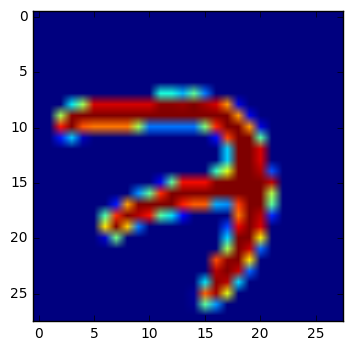

In [4]:
plt.imshow(batch_xs[0].reshape(28, 28))

In [5]:
batch_ys[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

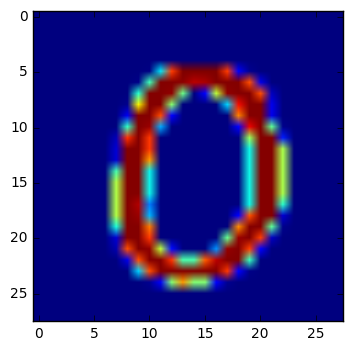

In [6]:
plt.imshow(batch_xs[10].reshape(28, 28))

In [7]:
batch_ys[10]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

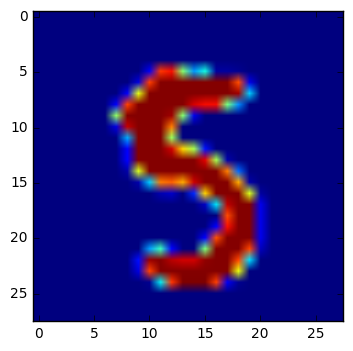

In [8]:
plt.imshow(batch_xs[60].reshape(28, 28))

In [9]:
batch_ys[60]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

The current state of the art in classifying these digits can be found here: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354

## Model  

In [10]:
def main(_):
  # Import data                                                                                                                                                  
  mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

  # Create the model                                                                                                                                             
  x = tf.placeholder(tf.float32, [None, 784])
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.zeros([10]))
  y = tf.matmul(x, W) + b

  # Define loss and optimizer                                                                                                                                    
  y_ = tf.placeholder(tf.float32, [None, 10])
                                                                                               
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
  train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

  #sess = tf.InteractiveSession()
  with tf.Session() as sess:
      tf.global_variables_initializer().run()                                                                                                                       
      #init = tf.initialize_all_variables()
      #sess.run(init)
      # Train                                                                                                                                                        
      for _ in range(iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

      # Test trained model                                                                                                                                           
      correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print(">>> Test Accuracy::"+str(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))



In [11]:
main(_)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
>>> Test Accuracy::0.9103


## TensorBoard: Visualizing Learning

In [12]:
from tensorflow.contrib.tensorboard.plugins import projector

def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar(var.name+'_mean', mean)
    #tf.scalar_summary(var.name+'_mean', mean)
    stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar(var.name+'_stddev', stddev)
    #tf.scalar_summary(var.name+'_stddev', stddev)
    tf.summary.scalar(var.name+'_max', tf.reduce_max(var))
    #tf.scalar_summary(var.name+'_max', tf.reduce_max(var))
    tf.summary.scalar(var.name+'_min', tf.reduce_min(var))
    #tf.histogram_summary( var.name, var)
    tf.summary.histogram( var.name, var)
    

def main2(_):
  # Import data                                                                                                                                                  
  mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)
    
  #config = tf.contrib.tensorboard.plugins.projector.ProjectorConfig()

  # input images
  with tf.name_scope('input'):
    # None -> batch size can be any size, 784 -> flattened mnist image
    x = tf.placeholder(tf.float32, shape=[None, 784], name="x-input") 
    
    xs = tf.Variable(tf.zeros([batch_size, 784]) , name="x-input-slice1")
    xs = tf.slice(x, [0, 0], [batch_size, 784] , name="x-input-slice2")
    
    variable_summaries(xs)
    
    #emb1 = config.embeddings.add()
    #emb1.tensor_name = xs.name
    #emb1.metadata_path = os.path.join(FLAGS.data_dir + '/_logs', 'metadata.tsv')
    
    # target 10 output classes
    y_ = tf.placeholder(tf.float32, shape=[None, 10], name="y-input")
    #variable_summaries(y_)
    
  with tf.name_scope('input_image'):
    image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
    tf.summary.image('image', image_shaped_input, 10)
    
  with tf.name_scope('W'):
    W = tf.Variable(tf.zeros([784, 10]))
    variable_summaries(W)
    
  with tf.name_scope('b'):
    b = tf.Variable(tf.zeros([10]))
    variable_summaries(b)
    
  with tf.name_scope('y'):
    y = tf.matmul(x, W) + b
    variable_summaries(y)

  with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
  tf.summary.scalar('cross_entropy', cross_entropy)
  #tf.scalar_summary('cross_entropy', cross_entropy)
    
  with tf.name_scope('train_step'):
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    
  # Test trained model     
  with tf.name_scope('accuracy-scope'):
    with tf.name_scope('correct_prediction'):
      correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

    with tf.name_scope('accuracy'):
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  tf.summary.scalar('accuracy-val', accuracy)
  #tf.scalar_summary('accuracy', accuracy)
        
  #######
  #init = tf.initialize_all_variables()

  # Create a saver for writing training checkpoints.
  saver = tf.train.Saver()

  #sess = tf.InteractiveSession()
  with tf.Session() as sess:
      tf.global_variables_initializer().run()       

      # Merge all the summaries and write them out to ./logs (by default)
      #merged = tf.merge_all_summaries()
      merged = tf.summary.merge_all()
      #writer = tf.train.SummaryWriter(FLAGS.data_dir + '/_logs',sess.graph)
      writer = tf.summary.FileWriter(FLAGS.data_dir + '/_logs',sess.graph)
        
      #projector.visualize_embeddings(writer, config)

      #sess.run(init)

      # Train          
      for i in range(iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

        if i % 100 == 0 or i == (iterations-1):
          summary = sess.run(merged, feed_dict={x: batch_xs, y_: batch_ys})
          writer.add_summary(summary, i)
          summary, acc = sess.run([merged, accuracy], feed_dict={x: mnist.test.images,y_: mnist.test.labels})
          writer.add_summary(summary, i)
          writer.flush()
          
          checkpoint_file = os.path.join(FLAGS.data_dir + '/_logs', 'checkpoint')
          saver.save(sess, checkpoint_file, global_step=i)
           
          print('>>> Test Accuracy [%s/%s]: %s' % (i,iterations,acc))

In [13]:
main2(_)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Summary name input/x-input-slice2:0_mean is illegal; using input/x-input-slice2_0_mean instead.
INFO:tensorflow:Summary name input/x-input-slice2:0_stddev is illegal; using input/x-input-slice2_0_stddev instead.
INFO:tensorflow:Summary name input/x-input-slice2:0_max is illegal; using input/x-input-slice2_0_max instead.
INFO:tensorflow:Summary name input/x-input-slice2:0_min is illegal; using input/x-input-slice2_0_min instead.
INFO:tensorflow:Summary name input/x-input-slice2:0 is illegal; using input/x-input-slice2_0 instead.
INFO:tensorflow:Summary name W/Variable:0_mean is illegal; using W/Variable_0_mean instead.
INFO:tensorflow:Summary name W/Variable:0_stddev is illegal; using W/Variable_0_stddev instead.
INFO:tensorflow:Summary name W/Variable:0_max is illegal; using W/Variable_0_max instead.
INFO:tensorflo

To run TensorBoard, use the following command (alternatively python -m tensorflow.tensorboard)

>tensorboard --logdir=_logs


### Cross Entropy on training set by step  

<img src="images/cross_entropy_train.png" />

### Accuracy on test set by step (learning curve)

<img src="images/accuracy_test_set.png" />

### Computation Graph

<img src="images/mnist_1_graph.png" />

### Distribution of weights

<img src="images/distr1.png" />

### Histogram of weights

<img src="images/hist1.png" />

### Images 

<img src="images/digit_image.JPG" />